In [1]:
%matplotlib inline
import pandas as pd
from pandas import *

import numpy as np
from sklearn.cross_validation import * 

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets, linear_model

import sklearn.linear_model as skl
from sklearn.linear_model import *

from sklearn.metrics import mean_squared_error
from math import sqrt

import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn import svm

C:\Users\Jagpreet\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
C:\Users\Jagpreet\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv("F://Rossmann//train.csv")
test = pd.read_csv("F://Rossmann//test.csv")
store = pd.read_csv("F://Rossmann//store.csv")


C:\Users\Jagpreet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("*** TRAIN INFO ***")
train.info()
print("*** TEST INFO ***")
test.info()
print("*** STORE INFO ***")
store.info()

*** TRAIN INFO ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
*** TEST INFO ***
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 8 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Date             41088 non-null object
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
dtypes: float64(1), in

In [4]:
#Splitting data into train and validation.

validation = pd.DataFrame(train.sort(['Date'], ascending=[True])[1000001:])
train = pd.DataFrame(train.sort(['Date'], ascending=[True])[:1000000])

C:\Users\Jagpreet\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\Jagpreet\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
validation.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
17590    866          4  2015-07-16   7591        537     1      1   
17589    865          4  2015-07-16   7545        616     1      1   
17588    864          4  2015-07-16   4384        628     1      1   
17587    863          4  2015-07-16   9829       1080     1      1   
17586    862          4  2015-07-16   9579       1181     1      1   

      StateHoliday  SchoolHoliday  
17590            0              0  
17589            0              1  
17588            0              0  
17587            0              0  
17586            0              0

In [6]:
#Converting date into Year and Month.
train['Year']  = train['Date'].apply(lambda x: int(str(x)[:4]))
train['Month'] = train['Date'].apply(lambda x: int(str(x)[5:7]))
train['MonthYear'] = train['Date'].apply(lambda x: str(x)[:7])

validation['Year']  = validation['Date'].apply(lambda x: int(str(x)[:4]))
validation['Month'] = validation['Date'].apply(lambda x: int(str(x)[5:7]))
validation['MonthYear'] = validation['Date'].apply(lambda x: str(x)[:7])

In [7]:
pd.unique(validation.StateHoliday)
#Here 0 is a character.

array(['0'], dtype=object)

In [8]:
pd.unique(train.StateHoliday)
#Here 0 is a character and other characters like a,b and c.

array(['a', '0', 'b', 'c', 0], dtype=object)

In [9]:
train.StateHoliday = train.StateHoliday.map({'a':1,'b':1,'c':1, 0:0, '0':0,1:1})
validation.StateHoliday = validation.StateHoliday.map({'a':1,'b':1,'c':1, 0:0, '0':0,1:1})

In [10]:
pd.unique(train.StateHoliday)

array([1, 0], dtype=int64)

In [11]:
pd.unique(train.SchoolHoliday)

array([1, 0], dtype=int64)

In [12]:
pd.unique(validation.StateHoliday)

array([0], dtype=int64)

In [13]:
traindf=pd.DataFrame(pd.merge(train, store, on='Store'))

In [14]:
validationdf=pd.DataFrame(pd.merge(validation,store,on='Store'))
#Using Merge function, I have merged the Store data with Validation and Train.

C:\Users\Jagpreet\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


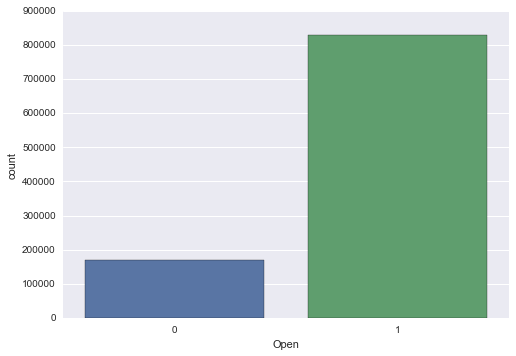

In [56]:
sns.countplot(x='Open', data=traindf)
#There were days for which store remained close and hence, sale on those days should be clocked as 0.

C:\Users\Jagpreet\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


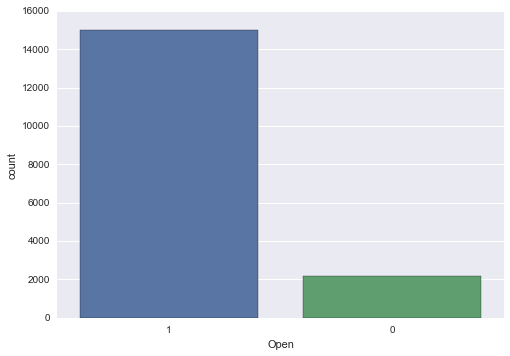

In [57]:
sns.countplot(x='Open', data=validationdf)
#There were days for which store remained close and hence, sale on those days should be clocked as 0.

C:\Users\Jagpreet\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


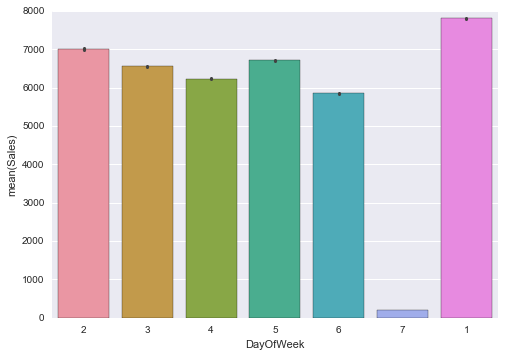

In [59]:
sns.barplot(x='DayOfWeek', y='Sales', data=traindf)
#It was seen that for Day = 7, there isn't much sale. Many stores remain close on those days.
#NA values might be filled with 0 sales for Day = 7.

In [15]:
pd.unique(traindf['PromoInterval'])

array(['Mar,Jun,Sept,Dec', nan, 'Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct'], dtype=object)

In [16]:
#Promo Interval has dtype of object and it would be nice if they are converted to dtype=category
traindf['PromoInterval']=traindf['PromoInterval'].astype('category')
validationdf['PromoInterval']=validationdf['PromoInterval'].astype('category')

In [17]:
pd.unique(traindf['StateHoliday'])

array([1, 0], dtype=int64)

In [18]:
#Removed Enteries for which Open = 0 as for them Sales = 0
validationOpendf=validationdf[validationdf['Open']!=0]

In [19]:
#Removed enteries for which Open =0 as for them Sales = 0
trainOpendf=traindf[traindf['Open']!=0]

In [20]:
#There are records for which despite being a StateHoliday, the Store was open.
pd.unique(trainOpendf['StateHoliday'])

array([0, 1], dtype=int64)

In [21]:
StoreOpenSaleZero=trainOpendf[(trainOpendf['Sales']==0)]
len(StoreOpenSaleZero)
#There are 54 stores which clocked sale as zero despite being open. Strange :P

54

In [22]:
ValidationStoreOpenSaleZero=validationOpendf[(validationOpendf['Sales']==0)]
ValidationStoreOpenSaleZero
#Shows no store with sale zero and store open.

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, Year, Month, MonthYear, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

[0 rows x 21 columns]

In [23]:
#There are 54 records for which despite being Store Open, Sale clocked is Zero.
#I'll consider these as outlier and remove it from TrainOpendf data
trainOpendf=trainOpendf[(trainOpendf['Sales']!=0)]

In [24]:
len(trainOpendf)
#I am left with 829393 records. Stores open and Sale Recorded.

829323

In [25]:
#Created a response variable i.e Sales
dependent=trainOpendf['Sales']

In [26]:
trainOpendf['DayOfWeek']=trainOpendf['DayOfWeek'].astype('int64')
trainOpendf['Open']=trainOpendf['Open'].astype('category')
trainOpendf['Promo']=trainOpendf['Promo'].astype('category')
trainOpendf['StateHoliday']=trainOpendf['StateHoliday'].astype('category')
trainOpendf['SchoolHoliday']=trainOpendf['SchoolHoliday'].astype('category')
trainOpendf['StoreType']=trainOpendf['StoreType'].astype('category')
trainOpendf['Assortment']=trainOpendf['Assortment'].astype('category')

In [82]:
trainOpendf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829323 entries, 1 to 999999
Data columns (total 21 columns):
Store                        829323 non-null int64
DayOfWeek                    829323 non-null int64
Date                         829323 non-null object
Sales                        829323 non-null int64
Customers                    829323 non-null int64
Open                         829323 non-null category
Promo                        829323 non-null category
StateHoliday                 829323 non-null category
SchoolHoliday                829323 non-null category
Year                         829323 non-null int64
Month                        829323 non-null int64
MonthYear                    829323 non-null object
StoreType                    829323 non-null object
Assortment                   829323 non-null object
CompetitionDistance          827178 non-null float64
CompetitionOpenSinceMonth    565492 non-null float64
CompetitionOpenSinceYear     565492 non-null float64


In [27]:
predictors=trainOpendf[['Store','DayOfWeek','Customers','Promo','StoreType','Assortment','Promo2']]

In [28]:
#Objective is to run for loop on each Store
trainOpen_dic = dict(list(trainOpendf.groupby('Store')))
validationOpen_dic = dict(list(validationOpendf.groupby('Store')))

In [359]:
validationOpen_dic

{1:        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
 11883      1          5  2015-07-17   4852        519     1      1   
 11884      1          6  2015-07-18   4406        512     1      0   
 11886      1          1  2015-07-20   4395        526     1      0   
 11887      1          2  2015-07-21   3558        469     1      0   
 11888      1          3  2015-07-22   3464        463     1      0   
 11889      1          4  2015-07-23   3769        503     1      0   
 11890      1          5  2015-07-24   3706        459     1      0   
 11891      1          6  2015-07-25   4364        500     1      0   
 11893      1          1  2015-07-27   6102        612     1      1   
 11894      1          2  2015-07-28   5011        560     1      1   
 11895      1          3  2015-07-29   4782        523     1      1   
 11896      1          4  2015-07-30   5020        546     1      1   
 11897      1          5  2015-07-31   5263        555     1      1   
 
 

In [29]:
for i in validationOpen_dic:
    Valid  = validationOpen_dic[i].copy()
    linearmodel = smf.ols(formula="Sales ~ Store + C(DayOfWeek) + Customers + C(Promo) + StoreType + Assortment + Promo2", data=trainOpen_dic[i]).fit()
    validationOpen_dic[i]['PreSales'] = linearmodel.predict(Valid)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [32]:
validationwithprediction=pd.DataFrame(columns=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'MonthYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','PreSales'])

In [33]:
validationwithprediction.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'MonthYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'PreSales'],
      dtype='object')

In [34]:
for i in validationOpen_dic:
    validationwithprediction=validationwithprediction.append(validationOpen_dic[i][::])

In [35]:
squared={}
squaredvalue=0
for i in range(0,len(validationwithprediction),1):
    diff=validationwithprediction.iloc[i,3]-validationwithprediction.iloc[i,21]
    bracket=diff/validationwithprediction.iloc[i,3]
    squared[i]=bracket**2
    squaredvalue=squaredvalue+squared[i]
rmspe=sqrt(squaredvalue/len(validationwithprediction))
rmspe

0.08208926572587937

In [36]:
mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
validationwithprediction.StoreType.replace(mappings, inplace=True)

In [145]:
validationwithprediction

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
11883      1          5  2015-07-17   4852        519     1      1   
11884      1          6  2015-07-18   4406        512     1      0   
11886      1          1  2015-07-20   4395        526     1      0   
11887      1          2  2015-07-21   3558        469     1      0   
11888      1          3  2015-07-22   3464        463     1      0   
11889      1          4  2015-07-23   3769        503     1      0   
11890      1          5  2015-07-24   3706        459     1      0   
11891      1          6  2015-07-25   4364        500     1      0   
11893      1          1  2015-07-27   6102        612     1      1   
11894      1          2  2015-07-28   5011        560     1      1   
11895      1          3  2015-07-29   4782        523     1      1   
11896      1          4  2015-07-30   5020        546     1      1   
11897      1          5  2015-07-31   5263        555     1      1   
13203      2          5  2015-07-17   4518        495     1      1   
13204      2          6  2015-07-18   3417        359     1      0   
13206      2          1  2015-07-20   4435        564     1      0   
13207      2          2  2015-07-21   3836        532     1      0   
13208      2          3  2015-07-22   5093        650     1      0   
13209      2          4  2015-07-23   4108        521     1      0   
13210      2          5  2015-07-24   3854        468     1      0   
13211      2          6  2015-07-25   2512        316     1      0   
13213      2          1  2015-07-27   6627        638     1      1   
13214      2          2  2015-07-28   5671        646     1      1   
13215      2          3  2015-07-29   6402        727     1      1   
13216      2          4  2015-07-30   5567        601     1      1   
13217      2          5  2015-07-31   6064        625     1      1   
13218      3          5  2015-07-17   6679        673     1      1   
13219      3          6  2015-07-18   4258        417     1      0   
13221      3          1  2015-07-20   5798        671     1      0   
13222      3          2  2015-07-21   5600        661     1      0   
...      ...        ...         ...    ...        ...   ...    ...   
1661    1113          3  2015-07-29   6640        589     1      1   
1662    1113          4  2015-07-30   7491        716     1      1   
1663    1113          5  2015-07-31   7289        720     1      1   
1632    1114          4  2015-07-16  24366       3448     1      1   
1633    1114          5  2015-07-17  23473       3592     1      1   
1634    1114          6  2015-07-18  22836       3437     1      0   
1636    1114          1  2015-07-20  23731       3566     1      0   
1637    1114          2  2015-07-21  21269       3461     1      0   
1638    1114          3  2015-07-22  20424       3284     1      0   
1639    1114          4  2015-07-23  20564       3231     1      0   
1640    1114          5  2015-07-24  19627       3286     1      0   
1641    1114          6  2015-07-25  21312       3242     1      0   
1643    1114          1  2015-07-27  26720       3468     1      1   
1644    1114          2  2015-07-28  25518       3456     1      1   
1645    1114          3  2015-07-29  25840       3545     1      1   
1646    1114          4  2015-07-30  24395       3251     1      1   
1647    1114          5  2015-07-31  27508       3745     1      1   
17193   1115          5  2015-07-17   7874        519     1      1   
17194   1115          6  2015-07-18   7264        504     1      0   
17196   1115          1  2015-07-20   6083        440     1      0   
17197   1115          2  2015-07-21   5074        352     1      0   
17198   1115          3  2015-07-22   5342        382     1      0   
17199   1115          4  2015-07-23   6150        435     1      0   
17200   1115          5  2015-07-24   5816        417     1      0   
17201   1115          6  2015-07-25   6897        478     1      0   
17203   1115     

In [140]:
#Support Vector Machine
for i in validationOpen_dic:
    Valid = validationOpen_dic[i][['Store','DayOfWeek','Customers','Promo','Promo2']]
    svmmodel = svm.SVR(C=0.5, epsilon=0.05, kernel='linear')
    svmmodel.fit(trainOpen_dic[i][['Store','DayOfWeek','Customers','Promo','Promo2']], trainOpen_dic[i]['Sales'])
    validationOpen_dic[i]['PreSalesSVM']=svmmodel.predict(Valid)

In [137]:
validationwithpredictionSVM=pd.DataFrame(columns=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'MonthYear',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval','PreSalesSVM'])

for i in validationOpen_dic:
    validationwithpredictionSVM=validationwithpredictionSVM.append(validationOpen_dic[i][::])
    
RMSE = mean_squared_error(validationwithpredictionSVM['Sales'], validationwithpredictionSVM['PreSalesSVM'])**0.5
RMSE

1820.9229314303834

In [37]:
#Storetype and Assortment values are changed to numerical values.
trainOpendf.StoreType=trainOpendf.StoreType.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})
validationOpendf.StoreType=validationOpendf.StoreType.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})

trainOpendf.Assortment=trainOpendf.Assortment.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})
validationOpendf.Assortment=validationOpendf.Assortment.map({'a':1,'b':2,'c':3,'d':4, 0:0, '0':0,1:1})


C:\Users\Jagpreet\Anaconda3\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
#CompetitionOpenSinceYear and Months are converted to only Months
trainOpendf['CompetitionOpen'] = 12 * (trainOpendf.Year - trainOpendf.CompetitionOpenSinceYear) + (trainOpendf.Month - trainOpendf.CompetitionOpenSinceMonth)
validationOpendf['CompetitionOpen'] = 12 * (validationOpendf.Year - validationOpendf.CompetitionOpenSinceYear) + (validationOpendf.Month - validationOpendf.CompetitionOpenSinceMonth)

C:\Users\Jagpreet\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
# All the NAs values in the CompetitionOpen are filled with 0's
trainOpendf.CompetitionOpen.fillna(0,inplace=True)
validationOpendf.CompetitionOpen.fillna(0,inplace=True)

C:\Users\Jagpreet\Anaconda3\lib\site-packages\pandas\core\generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [40]:
trainOpendf['OnlyDate'] = trainOpendf['Date'].apply(lambda x: int(str(x)[8:10]))
validationOpendf['OnlyDate'] = validationOpendf['Date'].apply(lambda x: int(str(x)[8:10]))

C:\Users\Jagpreet\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [59]:
import datetime
for i in range(0,len(trainOpendf),1):
    trainOpendf['WeekOfYear']=datetime.date(trainOpendf.iloc[i,9],trainOpendf.iloc[i,10],trainOpendf.iloc[i,22]).isocalendar()[1]

KeyboardInterrupt: 

In [174]:
#Promotion OpenSince Year and Month are converted to only Months.
trainOpendf['WeekOfYear'] = datetime.date(trainOpendf['Date']).isocalendar()[1]
trainOpendf['PromoOpen'] = 12 * (trainOpendf.year - trainOpendf.Promo2SinceYear) + (trainOpendf.woy - trainOpendf.Promo2SinceWeek) / float(4)
validationOpendf['PromoOpen'] = 12 * (validationOpendf.year - validationOpendf.Promo2SinceYear) + (validationOpendf.woy - data.Promo2SinceWeek) / float(4)

AttributeError: 'DataFrame' object has no attribute 'year'

In [ ]:
# All the NAs values in the CompetitionOpen are filled with 0's
trainOpendf.PromoOpen.fillna(0,inplace=True)
validationOpendf.PromoOpen.fillna(0,inplace=True)